(1000, 665)


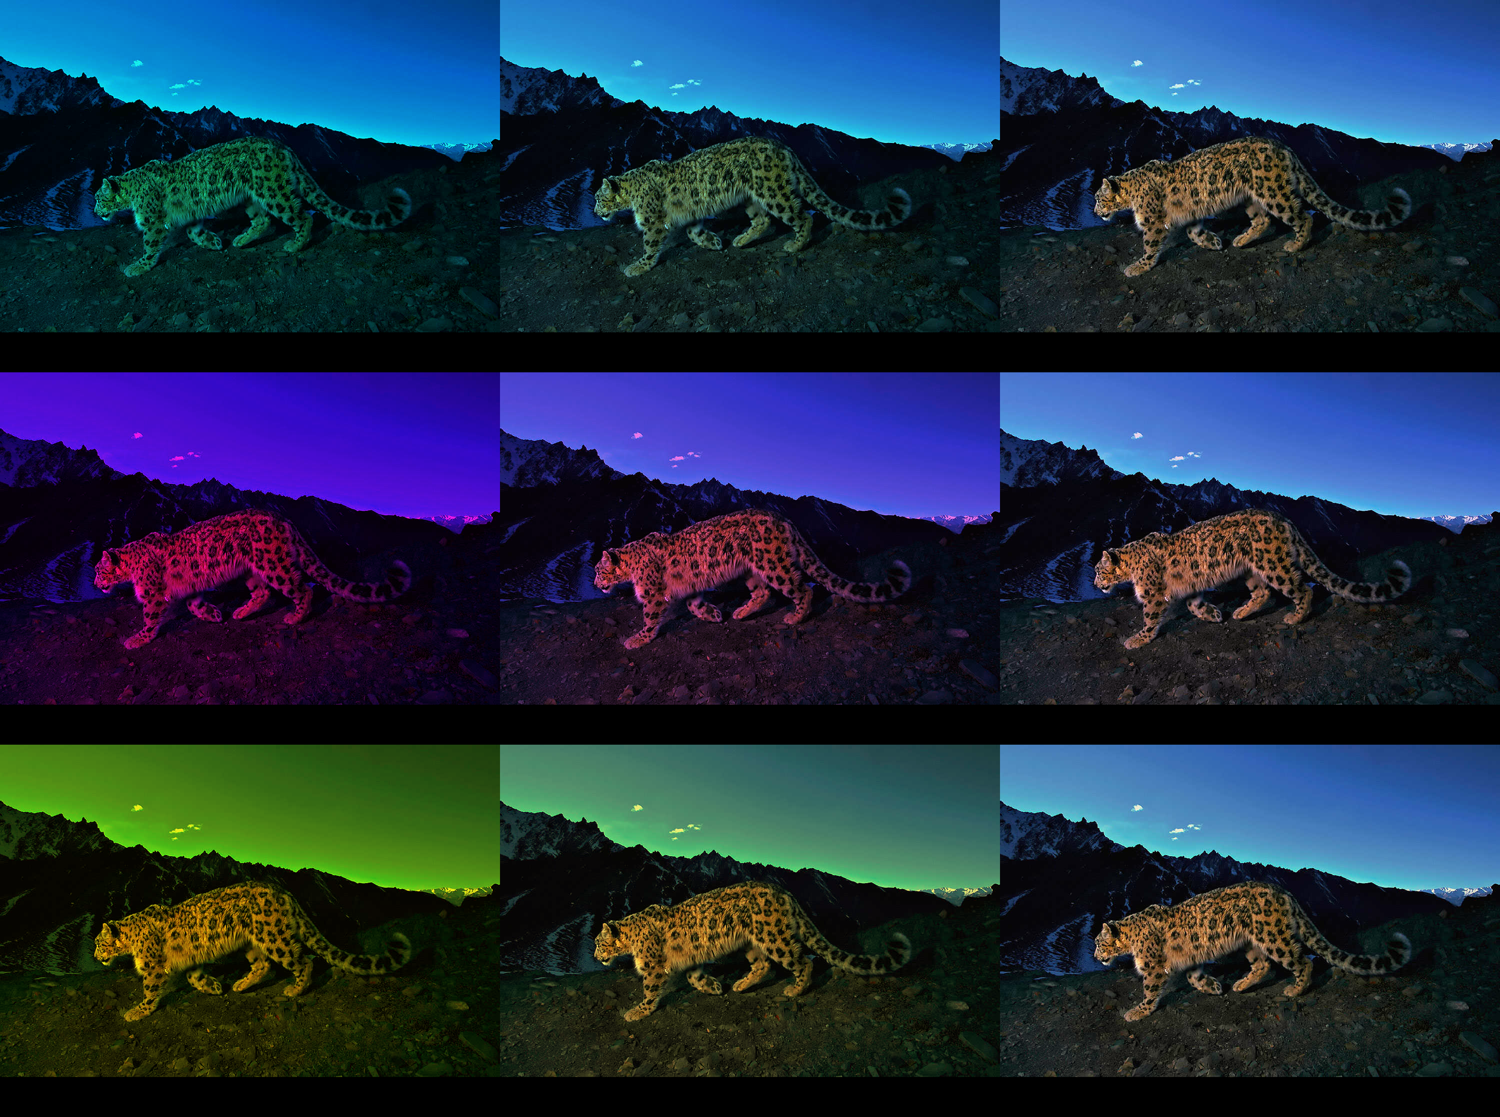

In [2]:
import PIL
from PIL import Image
from PIL import ImageEnhance
from PIL import ImageDraw
from PIL import ImageFont

# read image and convert to RGB
image=Image.open("snowy.jpg")
image=image.convert('RGB')
print(image.size)
contact_sheet=Image.new(image.mode, (image.width, image.height+80))
contact_sheet.paste(image,(0,0))
contact_sheet.save("assignment_photo.png")
image=Image.open("assignment_photo.png")
image=image.convert("RGB")

fontsize=100
font = ImageFont.truetype("FanwoodText-Regular.ttf", fontsize)

enhancer=ImageEnhance.Brightness(image)
intensity_low=(enhancer.enhance(0.1))
intensity_medium=(enhancer.enhance(0.5))
intensity_high=(enhancer.enhance(0.9))

all_chans=[]
blurbs=[]

for i in range(0,3):
    this_chan=[]
    this_chan.append(image.getchannel(i))
    this_chan.append(intensity_low.getchannel(i))
    this_chan.append(intensity_medium.getchannel(i))
    this_chan.append(intensity_high.getchannel(i))
    all_chans.append(this_chan)
    blurbs.append("channel " + str(i) + " intensity 0.1")
    blurbs.append("channel " + str(i) + " intensity 0.5")
    blurbs.append("channel " + str(i) + " intensity 0.9")

images=[]
order=[1,2,3,0,0,0,0,0,0]
for l in range(0,9):

    i=order[l]
    j=order[(l+6)%9]
    k=order[(l+3)%9]
    
    r=all_chans[0][i]
    g=all_chans[1][j]
    b=all_chans[2][k]
    mod_image =Image.merge("RGB",(r,g,b))
    writer=ImageDraw.Draw(mod_image)
    writer.text((50, 900), blurbs[l], fill=(500, 1000, 200), font=font)
    images.append(mod_image)


# create a contact sheet from different brightnesses
first_image=images[0]
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*3,first_image.height*3))
x=0
y=0


for img in images:
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y) )
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    if x+first_image.width == contact_sheet.width:
        x=0
        y=y+first_image.height
    else:
        x=x+first_image.width

# resize and display the contact sheet
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
display(contact_sheet)